# Exploring AirBnB in Europe     

by: **Miltos Tsolkas**    

A lot has been said and written about the effect of AirBnB around the world. Let's try to get a clearer understanding of the situation by examining the data collected by [Inside AirBnB](http://insideairbnb.com). Especially we will use the data, for the latest 12 months period for which data is available, for the following cities:

**Amsterdam**, **Athens**, **Barcelona**, **Berlin**, **Copenhagen**, **Dublin**, **Lisbon**, **London**, **Madrid**, **Paris**, **Rome**, **Venice**, **Vienna**

## AirBnB Listings

Let's find the number of AirBnB listings per city so  we can then show the information in tabular format and also make a plot.

### Step 1: Importing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2: Reading the data

Having downloaded the .csv files from the dataset, for these particular cities, it's time read them and save them into their respective variables. The data we will focus on for each city, for now, are from .csv files containing **Listings** which provide detailed information on Airbnb properties in that city.

**The names of the listins.csv files have been changed as to include the name of the city so that the reading of the files is not chaotic. For example amsterdam's listings.csv got renamed, during downloading, as amsterdam_listings.csv**

To begin, we will only read one .csv file to understand the state in which our data is and how we should handle it.
Let's start with the first one: the listings of Amsterdam.

In [2]:
amsterdam_listings = pd.read_csv('amsterdam_listings.csv')

This dataset contains a large number of rows, each representing an Airbnb listing in that city. It is also clear that the entirety of the table can't be printed because of the limitations of Jupiter Notebook. Eitherway, the information concerning what each column provides can be found online (mostly in [Airbnb Listings Dataset Overview](https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit?gid=1322284596#gid=1322284596))  
More specifically:


In [4]:
print(f"Column names:\n{amsterdam_listings.columns}")

Column names:
Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights

#### Column Descriptions


| Column Name                            | Description |
|----------------------------------------|-------------|
| `id`                                   | Unique identifier for each listing. |
| `listing_url`                          | URL link to the listing on the Airbnb platform. |
| `scrape_id`                            | Identifier for the data scraping session. |
| `last_scraped`                         | Date when the listing was last scraped. |
| `source`                               | Source of the listing data (usually Airbnb). |
| `name`                                 | Title of the listing. |
| `description`                          | Detailed description of the property provided by the host. |
| `neighborhood_overview`                | Overview of the neighborhood from the host's perspective. |
| `picture_url`                          | URL of the primary image of the listing. |
| `host_id`                              | Unique identifier for the host of the listing. |
| `host_url`                             | URL to the host's profile on Airbnb. |
| `host_name`                            | Name of the host. |
| `host_since`                           | Date when the host joined Airbnb. |
| `host_location`                        | Location information provided by the host. |
| `host_about`                           | Host's self-description. |
| `host_response_time`                   | Host's response time to inquiries (e.g., "within an hour"). |
| `host_response_rate`                   | Percentage rate of the host's responses to messages. |
| `host_acceptance_rate`                 | Percentage rate of booking requests accepted by the host. |
| `host_is_superhost`                    | Whether the host is a Superhost (`t` or `f`). |
| `host_thumbnail_url`                   | URL to the host's profile thumbnail image. |
| `host_picture_url`                     | URL to the host's full profile image. |
| `host_neighbourhood`                   | Neighborhood where the host resides. |
| `host_listings_count`                  | Number of active listings hosted by this host. |
| `host_total_listings_count`            | Total number of listings, including inactive, hosted by this host. |
| `host_verifications`                   | List of verification methods completed by the host (e.g., email, phone). |
| `host_has_profile_pic`                 | Indicates if the host has a profile picture (`t` or `f`). |
| `host_identity_verified`               | Whether the host's identity is verified (`t` or `f`). |
| `neighbourhood`                        | General neighborhood where the listing is located. |
| `neighbourhood_cleansed`               | Standardized name of the neighborhood. |
| `neighbourhood_group_cleansed`         | Larger neighborhood grouping, if applicable. |
| `latitude`                             | Latitude of the listing's location. |
| `longitude`                            | Longitude of the listing's location. |
| `property_type`                        | Type of property (e.g., Apartment, House). |
| `room_type`                            | Type of room offered (e.g., Entire home/apt, Private room). |
| `accommodates`                         | Maximum number of guests the listing can accommodate. |
| `bathrooms`                            | Number of bathrooms available (older format, often `NULL`). |
| `bathrooms_text`                       | Descriptive text of the bathroom facilities. |
| `bedrooms`                             | Number of bedrooms in the listing. |
| `beds`                                 | Number of beds available in the listing. |
| `amenities`                            | List of amenities provided by the host. |
| `price`                                | Price per night in the local currency. |
| `minimum_nights`                       | Minimum number of nights required to book the listing. |
| `maximum_nights`                       | Maximum number of nights a booking can be made for the listing. |
| `minimum_minimum_nights`               | Minimum of the minimum nights requirement across the calendar. |
| `maximum_minimum_nights`               | Maximum of the minimum nights requirement across the calendar. |
| `minimum_maximum_nights`               | Minimum of the maximum nights limit across the calendar. |
| `maximum_maximum_nights`               | Maximum of the maximum nights limit across the calendar. |
| `minimum_nights_avg_ntm`               | Average minimum nights requirement over the next 12 months. |
| `maximum_nights_avg_ntm`               | Average maximum nights requirement over the next 12 months. |
| `calendar_updated`                     | How frequently the calendar is updated by the host. |
| `has_availability`                     | Whether the listing has availability (`t` or `f`). |
| `availability_30`                      | Number of days available in the next 30 days. |
| `availability_60`                      | Number of days available in the next 60 days. |
| `availability_90`                      | Number of days available in the next 90 days. |
| `availability_365`                     | Number of days available in the next 365 days. |
| `calendar_last_scraped`                | Date the availability calendar was last scraped. |
| `number_of_reviews`                    | Total number of reviews the listing has received. |
| `number_of_reviews_ltm`                | Number of reviews in the last 12 months. |
| `number_of_reviews_l30d`               | Number of reviews in the last 30 days. |
| `first_review`                         | Date of the first review for the listing. |
| `last_review`                          | Date of the most recent review for the listing. |
| `review_scores_rating`                 | Overall rating score (out of 100). |
| `review_scores_accuracy`               | Accuracy rating score (out of 10). |
| `review_scores_cleanliness`            | Cleanliness rating score (out of 10). |
| `review_scores_checkin`                | Check-in process rating score (out of 10). |
| `review_scores_communication`          | Communication rating score (out of 10). |
| `review_scores_location`               | Location rating score (out of 10). |
| `review_scores_value`                  | Value-for-money rating score (out of 10). |
| `license`                              | License information, if required by local authorities. |
| `instant_bookable`                     | Whether the listing can be instantly booked (`t` or `f`). |
| `calculated_host_listings_count`       | Calculated number of listings managed by the host. |
| `calculated_host_listings_count_entire_homes` | Calculated number of entire homes managed by the host. |
| `calculated_host_listings_count_private_rooms` | Calculated number of private rooms managed by the host. |
| `calculated_host_listings_count_shared_rooms`  | Calculated number of shared rooms managed by the host. |
| `reviews_per_month`                    | Average number of reviews per month the listing receives. |


First things first, let's see what are the default data types for all of our collected data.

In [5]:
#initializing a dictionary that will group column names by their data types
dtype_groups = {}

#looping through each column and its data type in our DataFrame  & updating dtype_groups
for col_name, dtype in amsterdam_listings.dtypes.items():
    dtype_str = str(dtype)
    if dtype_str in dtype_groups:
        dtype_groups[dtype_str].append(col_name)
    else:
        dtype_groups[dtype_str] = [col_name]

for dtype, columns in dtype_groups.items():
    print(f"Columns with data type {dtype}:\n{', '.join(columns)}\n")

Columns with data type int64:
id, scrape_id, host_id, host_listings_count, host_total_listings_count, accommodates, minimum_nights, maximum_nights, availability_30, availability_60, availability_90, availability_365, number_of_reviews, number_of_reviews_ltm, number_of_reviews_l30d, calculated_host_listings_count, calculated_host_listings_count_entire_homes, calculated_host_listings_count_private_rooms, calculated_host_listings_count_shared_rooms

Columns with data type object:
listing_url, last_scraped, source, name, description, neighborhood_overview, picture_url, host_url, host_name, host_since, host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, host_is_superhost, host_thumbnail_url, host_picture_url, host_neighbourhood, host_verifications, host_has_profile_pic, host_identity_verified, neighbourhood, neighbourhood_cleansed, property_type, room_type, bathrooms_text, amenities, price, has_availability, calendar_last_scraped, first_review, last_revi

We notice that columns `last_scraped`, `host_since`, `calendar_last_scraped`, `first_review`, `last_review` are of data type object. It would be useful for our implementation later that they were DateTime objects. We also notice that `price` is of type object, when we want it to be float and we also want to lose the $ sign from each price, so we can use the price value alone in calculations.

Now that we know all the modifications me need to make in reading the .csv files, let's do it the correct way.

In [6]:
#columns i want to turn into DateTime Objects
date_cols = ['last_scraped', 'host_since', 'calendar_last_scraped', 'first_review', 'last_review']

city_name_list = [
    'amsterdam', 'athens', 'barcelona', 'berlin', 'copenhagen', 'dublin', 
    'lisbon', 'london', 'madrid', 'paris', 'rome', 'venice', 'vienna'
]
city_listings = {}

for city in city_name_list:
    city_listings[city] = pd.read_csv(
        f'{city}_listings.csv',
        parse_dates=date_cols,
        converters={'price': lambda x: float(x.replace('$', '').replace(',', '')) if x != '' else np.nan}
    )

Let's now check, informatively, the shapes of our DataFrames. We'll also see whether our values of dates and prices are now how we want them to be, keeping the example of Amsterdam.

In [7]:
for city, df in city_listings.items():
    print(f"City: {city}, Shape: {df.shape}")

print("\nAmsterdam data types of relevant columns:\nlast_scraped: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\nhost_since: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\ncalendar_last_scraped: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\nfirst_review: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\nlast_review: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\nprice: ", city_listings['amsterdam']['last_scraped'].dtype)

City: amsterdam, Shape: (9659, 75)
City: athens, Shape: (13274, 75)
City: barcelona, Shape: (19482, 75)
City: berlin, Shape: (13759, 75)
City: copenhagen, Shape: (20909, 75)
City: dublin, Shape: (6175, 75)
City: lisbon, Shape: (24204, 75)
City: london, Shape: (96182, 75)
City: madrid, Shape: (26980, 75)
City: paris, Shape: (95461, 75)
City: rome, Shape: (34061, 75)
City: venice, Shape: (8322, 75)
City: vienna, Shape: (14396, 75)

Amsterdam data types of relevant columns:
last_scraped:  datetime64[ns] 
host_since:  datetime64[ns] 
calendar_last_scraped:  datetime64[ns] 
first_review:  datetime64[ns] 
last_review:  datetime64[ns] 
price:  datetime64[ns]


It's time to check if our data is indeed of  **the latest 12 months period** for which data is available. 

In [8]:
for city, df in city_listings.items():
    print(f"{city.capitalize()} Table Rows:\n", 
          (df['last_scraped'] < (pd.to_datetime('today') - pd.DateOffset(months=12))).sum(), 
          "(Not from latest 12 months),", 
          (df['last_scraped'] >= (pd.to_datetime('today') - pd.DateOffset(months=12))).sum(), 
          "(From latest 12 months),", 
          len(df), "(Total rows)")

Amsterdam Table Rows:
 0 (Not from latest 12 months), 9659 (From latest 12 months), 9659 (Total rows)
Athens Table Rows:
 0 (Not from latest 12 months), 13274 (From latest 12 months), 13274 (Total rows)
Barcelona Table Rows:
 0 (Not from latest 12 months), 19482 (From latest 12 months), 19482 (Total rows)
Berlin Table Rows:
 0 (Not from latest 12 months), 13759 (From latest 12 months), 13759 (Total rows)
Copenhagen Table Rows:
 0 (Not from latest 12 months), 20909 (From latest 12 months), 20909 (Total rows)
Dublin Table Rows:
 0 (Not from latest 12 months), 6175 (From latest 12 months), 6175 (Total rows)
Lisbon Table Rows:
 0 (Not from latest 12 months), 24204 (From latest 12 months), 24204 (Total rows)
London Table Rows:
 0 (Not from latest 12 months), 96182 (From latest 12 months), 96182 (Total rows)
Madrid Table Rows:
 0 (Not from latest 12 months), 26980 (From latest 12 months), 26980 (Total rows)
Paris Table Rows:
 0 (Not from latest 12 months), 95461 (From latest 12 months), 9546

Nice, all of our data is from the latest 12 months period of available data.  
Now let's see if there are duplicates in any of the listings. If not, that would mean that each row is one different listing of the latest 12 months period for which data is available. 

In [9]:
for city, df in city_listings.items():
    value_counts_of_city = df['id'].value_counts()
    print(f"{city.capitalize()} duplicates: ", len(value_counts_of_city[value_counts_of_city>1]))

Amsterdam duplicates:  0
Athens duplicates:  0
Barcelona duplicates:  0
Berlin duplicates:  0
Copenhagen duplicates:  0
Dublin duplicates:  0
Lisbon duplicates:  0
London duplicates:  0
Madrid duplicates:  0
Paris duplicates:  0
Rome duplicates:  0
Venice duplicates:  0
Vienna duplicates:  0


Conserning possible **outliers**:  
Since we’re examining the number of listings, outliers in other metrics (like price) shouldn’t affect our analysis for now. Removing listings would likely reduce the accuracy of your data.

### Step 3: Presenting the number of AirBnB listings per city

Now that we are sure of the time for which data is available and we know no city's listings has duplicates, we can safely say that the number of AirBnB listings per city is just the number of rows in the listing dataframe of said city,

**Here is the number of AirBnB listings per city:** 

In [10]:
for city, df in city_listings.items():
    print(f"{city.capitalize()}'s number of AirBnB listings: ", df.shape[0])

Amsterdam's number of AirBnB listings:  9659
Athens's number of AirBnB listings:  13274
Barcelona's number of AirBnB listings:  19482
Berlin's number of AirBnB listings:  13759
Copenhagen's number of AirBnB listings:  20909
Dublin's number of AirBnB listings:  6175
Lisbon's number of AirBnB listings:  24204
London's number of AirBnB listings:  96182
Madrid's number of AirBnB listings:  26980
Paris's number of AirBnB listings:  95461
Rome's number of AirBnB listings:  34061
Venice's number of AirBnB listings:  8322
Vienna's number of AirBnB listings:  14396


**Here is the number of AirBnB listings per city in tabular format:** 

In [11]:
total_listings = pd.DataFrame({
  "City": [city.capitalize() for city in city_name_list],  
  "Listings": [city_listings[city]['id'].nunique() for city in city_name_list]  
})


total_listings.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["1", "2", "3", "4", "5", "6", "7", "8", "9", 
                  "10", "11", "12", "13"], axis=0) \
  .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
  ])

,CITY,LISTINGS
1,Amsterdam,9.659
2,Athens,13.274
3,Barcelona,19.482
4,Berlin,13.759
5,Copenhagen,20.909
6,Dublin,6.175
7,Lisbon,24.204
8,London,96.182
9,Madrid,26.980
10,Paris,95.461


**And Here is the number of AirBnB listings per city in a plot format:** 

To plot the number of listings per city, we use a **bar chart** because it allows us to compare the frequency (number of listings) across different categories (cities), which is ideal for discrete data like ours.

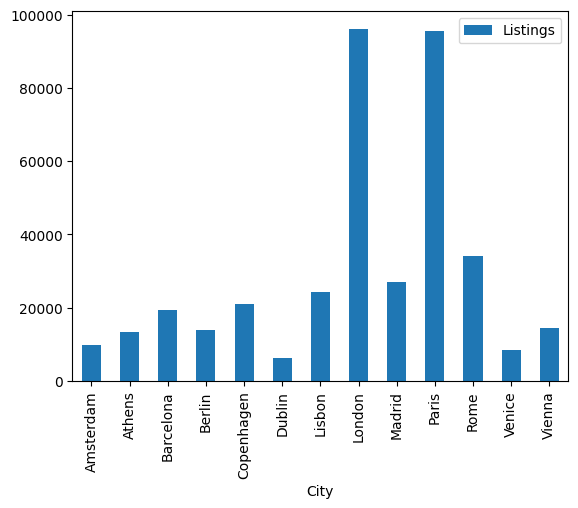

In [12]:
barchart_listings = total_listings.plot.bar(x = "City", y="Listings")

## AirBnB Densities

Apart from the number of distinct listings, we are interested in calculating the density of Airbnb listings, defined as the number of listings per 1,000 inhabitants for the latest 12-month period available. To determine the population of each city, we use data from the [API Ninjas City API](https://api-ninjas.com/api/city), a reliable and efficient source of recent population data for cities worldwide. 

The API Ninjas City API was chosen for its user-friendly access and comprehensive global coverage, making it straightforward to retrieve up-to-date population data consistently across multiple cities. This ensures that our population figures are standardized, which supports the accuracy and comparability of our density calculations.

Firstly, let's import the essentials to interact with this API: 


In [13]:
import requests
import json

To gather the population data for each city, we will make requests to the [API Ninjas City API](https://api-ninjas.com/api/city) for each city in our dataset. By specifying the city name in the request URL, we can retrieve population and other geographical details in a structured JSON format, which we will parse to extract population figures.

Our approach will follow these steps:
1. Looping through each city name and format it into the API request URL.
2. Making a GET request to the API using our API key, `2R8+tNci2IEaUuXbth2HSw==v6qdrdzrWeJeEcNL`.
3. Parsing the JSON response to retrieve the population data.
4. Storing the population figures in a dictionary with each city's name as the key for easy reference in our density calculations.

In [ ]:
api_response = {}

for city in city_name_list:
    name = city
    api_url = 'https://api.api-ninjas.com/v1/city?name={}'.format(name)
    response = requests.get(api_url, headers={'X-Api-Key': '2R8+tNci2IEaUuXbth2HSw==v6qdrdzrWeJeEcNL'})
    if response.status_code == requests.codes.ok:
        api_response[name] = response.text
    else:
        print("Error:", response.status_code, response.text)

print(api_response)


{'amsterdam': '[{"name": "Amsterdam", "latitude": 52.35, "longitude": 4.9166, "country": "NL", "population": 1031000, "region": "North Holland", "is_capital": true}]', 'athens': '[{"name": "Athens", "latitude": 37.9794, "longitude": 23.7161, "country": "GR", "population": 664046, "region": "Attica", "is_capital": true}]', 'barcelona': '[{"name": "Barcelona", "latitude": 41.3825, "longitude": 2.1769, "country": "ES", "population": 4588000, "region": "Catalonia", "is_capital": false}]', 'berlin': '[{"name": "Berlin", "latitude": 52.5167, "longitude": 13.3833, "country": "DE", "population": 3644826, "region": "N/A", "is_capital": true}]', 'copenhagen': '[{"name": "Copenhagen", "latitude": 55.6786, "longitude": 12.5635, "country": "DK", "population": 1085000, "region": "Capital Region of Denmark", "is_capital": true}]', 'dublin': '[{"name": "Dublin", "latitude": 53.3425, "longitude": -6.2658, "country": "IE", "population": 1173179, "region": "Leinster", "is_capital": true}]', 'lisbon': '[{

Great! Now let's get from this response the information we're interested in, the population.   

In [15]:
cities_population = {}

for city, city_data in api_response.items():
    city_info = json.loads(city_data)  
    population = city_info[0]["population"]  
    
    cities_population[city] = population

print(cities_population)

{'amsterdam': 1031000, 'athens': 664046, 'barcelona': 4588000, 'berlin': 3644826, 'copenhagen': 1085000, 'dublin': 1173179, 'lisbon': 506654, 'london': 10979000, 'madrid': 3266126, 'paris': 11020000, 'rome': 2872800, 'venice': 261905, 'vienna': 1840573}


### Let's calculate the Density (number of AirBnB listings per 1,000 inhabitants)

**Step 1**: For each city, we will calculate the number of AirBnB listings.

**Step 2**: We will get the population of the city from the `cities_population` dictionary.

**Step 3**: Then we will calculate the listings density by dividing the number of listings by the population, then multiplying by 1,000 to get the value per 1,000 inhabitants.

**More specifically**:   

The number of listings is obtained using `len(city_listings[city])` and the population is fetched from `cities_population[city]`. The density is then calculated using the formula:  
  
**Listings Density = (Number of Listings / Population) * 1000**


In [16]:
listings_density = {}

for city in city_name_list:
    num_listings = len(city_listings[city])

    population = cities_population[city]

    density = (num_listings / population) * 1000

    listings_density[city] = density

Let's see in **tabular form** the density of AirBnB listings per 1,000 inhabitants for each city.

In [17]:
listings_per_inhabitants = pd.DataFrame({
  "City": [city.capitalize() for city in listings_density],  
  "Listings Per 1.000 Inhabitants": [listings_density[city] for city in listings_density]  
})


listings_per_inhabitants.style \
  .format(precision=3, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["1", "2", "3", "4", "5", "6", "7", "8", "9", 
                  "10", "11", "12", "13"], axis=0) \
  .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
  ])

,CITY,LISTINGS PER 1.000 INHABITANTS
1,Amsterdam,"9,369"
2,Athens,"19,990"
3,Barcelona,"4,246"
4,Berlin,"3,775"
5,Copenhagen,"19,271"
6,Dublin,"5,263"
7,Lisbon,"47,772"
8,London,"8,761"
9,Madrid,"8,261"
10,Paris,"8,663"


A **bar plot** is a great way to show the listings density across different cities. It makes it easy to compare the density of AirBnB listings per 1,000 inhabitants for each city.

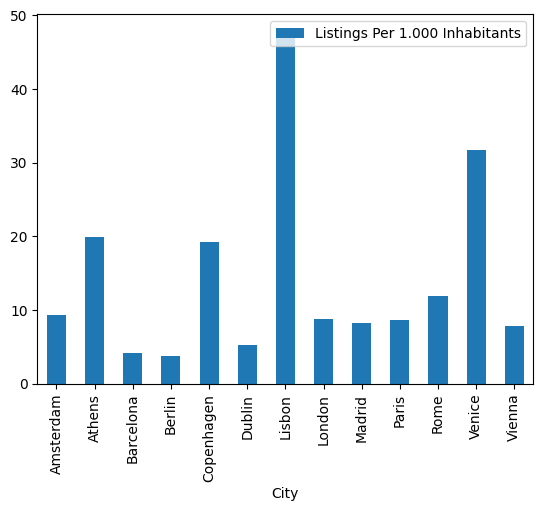

In [18]:
barchart_listings_density = listings_per_inhabitants.plot.bar(x = "City", y="Listings Per 1.000 Inhabitants")

## Activity

We are interested in the AirBnB bookings and income per listing for each city. We need to find the `Average of the Income per Listing for Each City`.

To estimate that value for a city, say X, We have to calculate in this order:
* **The Average Number Of Nights Booked for Every Listing of City X**,
* **The Income Of Every Listing of City X**, and finally
* **The Average Income per Listing of city X**

We are once again only interested in the data for the latest 12 months period for which data is available !!

Before starting any calculations, let's state a few assumptions we've made in order to approach the average number of nights booked:  
**a)** Ηalf of the bookings have reviews, and  
**b)** Each booking is for three nights

Also, we can retrieve the information of *price per booking* using data of the column `price` of each city and we can see the *number of reviews the last 12 months* of each city using the data of the column `number_of_reviews_ltm`, where ltm stands for Last Twelve Months.

Before any coding, let's see which formulas we will use to calculate the values we want:

* **The Average Number Of Nights Booked for Every Listing of City X**  
Since we assume only 1/2 of the bookings have reviews, then `n reviews = 2*n bookings`. On top of that, since we assume that each booking lasts 3 nights we need to multiply by 3 the number of bookings for each listing. So:  
if `n` = Number of Bookings for Listing Y of City X, as seen in the column `number_of_reviews_ltm` of the listings of X   
then for each listing Y of city X:
$$
\text{Average Number Of Nights Booked for Listing Y} = \text{2 * 3 * n}
$$

* **The Income Of Every Listing of City X**  
We will simply multiply for every listing Y of city X the **Average Number Of Nights Booked for Listing Y of City X** by the listing's price, as seen in the column `price` for the row of listing Y. So:  
if `k` = Average Number Of Nights Booked for Listing Y of City X, as calculated before, then for each listing Y of city X:     
$$
\text{Income Of Listing Y} = \text{k * Price Of Listing Y}
$$ 

* **The Average Income per Listing of city X**   
We will simply have to find the sum of all the Incomes per Listing, for each Listing Y of City X, and divide by the Total Number of Listings of City X. The formula is as follows:  
$$
\text{Average Income per Listing for the City} = \frac{\sum (\text{Income per Listing for each listing in the city})}{\text{Number of Listings in the City}}
$$

### Step 1: Checking the state of our data

We want the columns `number_of_reviews_ltm` and `price` that we will use, to be of types **Int** and **Float** respectively. Let's once again make sure this is the case, using 3 random cities as examples:

In [19]:
print("\nAmsterdam data types of relevant columns:", 
      "\nprice: ", city_listings['amsterdam']['last_scraped'].dtype, 
      "\nnumber_of_reviews_ltm: ", city_listings['amsterdam']['number_of_reviews_ltm'].dtype)

print("\nParis data types of relevant columns:", 
      "\nprice: ", city_listings['paris']['last_scraped'].dtype, 
      "\nnumber_of_reviews_ltm: ", city_listings['paris']['number_of_reviews_ltm'].dtype)

print("\nVienna data types of relevant columns:", 
      "\nprice: ", city_listings['vienna']['last_scraped'].dtype, 
      "\nnumber_of_reviews_ltm: ", city_listings['vienna']['number_of_reviews_ltm'].dtype)



Amsterdam data types of relevant columns: 
price:  datetime64[ns] 
number_of_reviews_ltm:  int64

Paris data types of relevant columns: 
price:  datetime64[ns] 
number_of_reviews_ltm:  int64

Vienna data types of relevant columns: 
price:  datetime64[ns] 
number_of_reviews_ltm:  int64


Great, now we want to see if any of the data we will use in the calculations of this part are null or 0 (which would lead to error or turn any multiplication into 0)

In [20]:
for city, df in city_listings.items():
    zeros_in_price = (df['price'] == 0).sum()
    nan_in_price = df['price'].isna().sum()
    zeros_in_reviews_ltm = (df['number_of_reviews_ltm'] == 0).sum()
    nan_in_reviews_ltm = df['number_of_reviews_ltm'].isna().sum()
    
    print(f"{city.capitalize()}'s number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): {zeros_in_price}, {nan_in_price}, {zeros_in_reviews_ltm}, {nan_in_reviews_ltm}")

Amsterdam's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 3790, 3022, 0
Athens's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 206, 2776, 0
Barcelona's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 4060, 7612, 0
Berlin's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 4938, 6824, 0
Copenhagen's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 7313, 6815, 0
Dublin's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 1, 964, 1301, 0
Lisbon's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 2971, 5904, 0
London's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 32977, 46864, 0
Madrid's number of zeros and NaN prices and zeros and NaN num of reviews ltm (respectively): 0, 5912, 9256, 0


It is clear there are multiple multiple **NaN in the prices** and **zeros in the reviews**. There is also **a zero in Dublin's prices**.  

Since we are looking to calculate the average income per lising for our cities there's no reason to keep lines with lacking information about the price, since that would be of no use when calculating the income. That said, there is no issue on the Dublin listing where the price is 0 because that will simply eliminate the income of that particular listing.  
  
When it comes to the case where the of number of reviews in the last twelve months is 0 that could mean 2 things:  
* either the airbnb did not have any bookings, or,  
* since we assume that half of the bookings have reviews, the listing could've had one booking without review.  
We will choose the first scenario, as selecting the second would mean making an assumption based on another assumption, which could lead us further from the truth.  

Let's make a copy of our listings table in which we'll remove all listings for which the prices are null.

In [21]:
city_listings_copy = {city: df.dropna(subset=['price']) for city, df in city_listings.items()}

Let's check if the null prices are removed!

In [22]:
for city, df in city_listings_copy.items():
    nan_in_price_copy = df['price'].isna().sum()
    
print(f"{city.capitalize()}'s number of NaN prices: {nan_in_price_copy}")

Vienna's number of NaN prices: 0


Now that all null prices are removed, it's time to find out more details about our data. We'll see the following values for our relevant data:  
- **Count**: The number of non-null values in each column.
- **Mean**: The average value of each column.
- **Standard Deviation (`std`)**: Measures the spread of data around the mean.
- **Minimum (`min`)**: The smallest value in each column.
- **25% (First Quartile)**: The value below which 25% of the data fall.
- **50% (Median)**: The middle value (50th percentile) of each column.
- **75% (Third Quartile)**: The value below which 75% of the data fall.
- **Maximum (`max`)**: The largest value in each column.     

And **we will consider whether we should remove some outliers.**
  
- Starting with the **price**:  
Let's begin using once again the example of Amsterdam. We have the following values:  

In [23]:
city_listings_copy['amsterdam']['price'].describe().round(2)

count     5869.00
mean       289.64
std       1216.78
min         11.00
25%        164.00
50%        225.00
75%        321.00
max      91466.00
Name: price, dtype: float64

Since there is a big difference between the Max and the Mean, or even between the max and the 3rd Quartile (75%), it is easy to suspect that there are outliers in our data. By removing these outliers, we can obtain a more accurate representation of the typical income per listing, ensuring that the average income reflects the majority of the data rather than being skewed by extreme values.    
  
Let's make a boxplot to see if it will verify our suspicions. A boxplot is used to detect outliers because it visually highlights the distribution of data, including the median, quartiles, and any data points outside the "whiskers"(whiskers represent the range of data within a specific threshold).

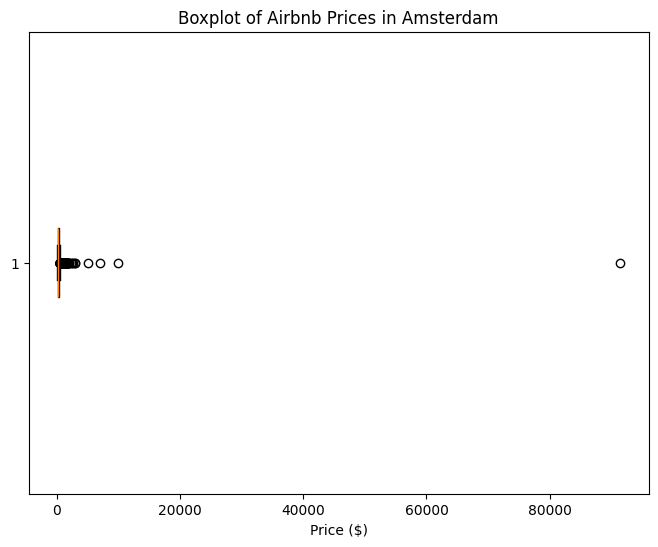

In [24]:
plt.figure(figsize=(8, 6))
plt.boxplot(city_listings_copy['amsterdam']['price'], vert=False, patch_artist=True)
plt.title("Boxplot of Airbnb Prices in Amsterdam")
plt.xlabel("Price ($)")
plt.show()

It is clear that we should delete all values above 20.000, because there is a huge gap in our data after 20.000. We can also see that most values are in the first 1/4  of the range of prices [0,20.000], which means **anything inbetweeen [5.000,20.000]** is also **not representative of our average price range**. If we trim our data this way, there will still be a few outliers, but they will be representative of the range of prices in Amsterdam.   
Let's see how many prices are in each price range

In [25]:
price_thresholds = [5000, 4000, 3000, 2000, 1000, 999]
for threshold in price_thresholds:
    if threshold >= 1000:
        print(f"Number of prices > {threshold:.3f} : {city_listings_copy['amsterdam'][city_listings_copy['amsterdam']['price'] > threshold]['price'].count()}")
    else:
        print(f"Number of prices <= {threshold:.3f} : {city_listings_copy['amsterdam'][city_listings_copy['amsterdam']['price'] <= threshold]['price'].count()}")

Number of prices > 5000.000 : 3
Number of prices > 4000.000 : 4
Number of prices > 3000.000 : 4
Number of prices > 2000.000 : 9
Number of prices > 1000.000 : 52
Number of prices <= 999.000 : 5809


In total there are only 9 prices above  $2.000, and 9 prices is approximately 0.155% of the total 5809 prices. It is clear that we should **trim our data to only include listings with prices that are less or equal to $2.000**, so that we don't have many outliers, but also so that our analysis reflects that enough prices (52 to be specific) can get higher than $1.000.  
  
Let's now see the updated discription of our data, for Amsterdam, and the updated boxplot.

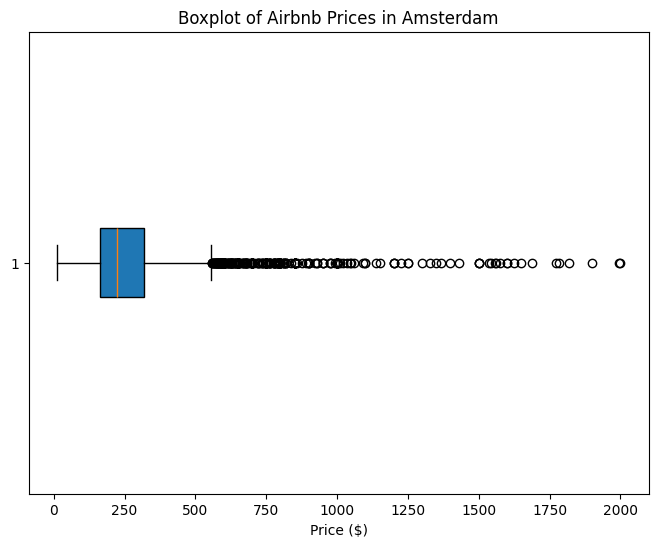

In [26]:
city_listings_copy['amsterdam'] = city_listings_copy['amsterdam'][city_listings_copy['amsterdam']['price']<=2000]
plt.figure(figsize=(8, 6))
plt.boxplot(city_listings_copy['amsterdam']['price'], vert=False, patch_artist=True)
plt.title("Boxplot of Airbnb Prices in Amsterdam")
plt.xlabel("Price ($)")
plt.show()

Let's check the boxplots for all other cities

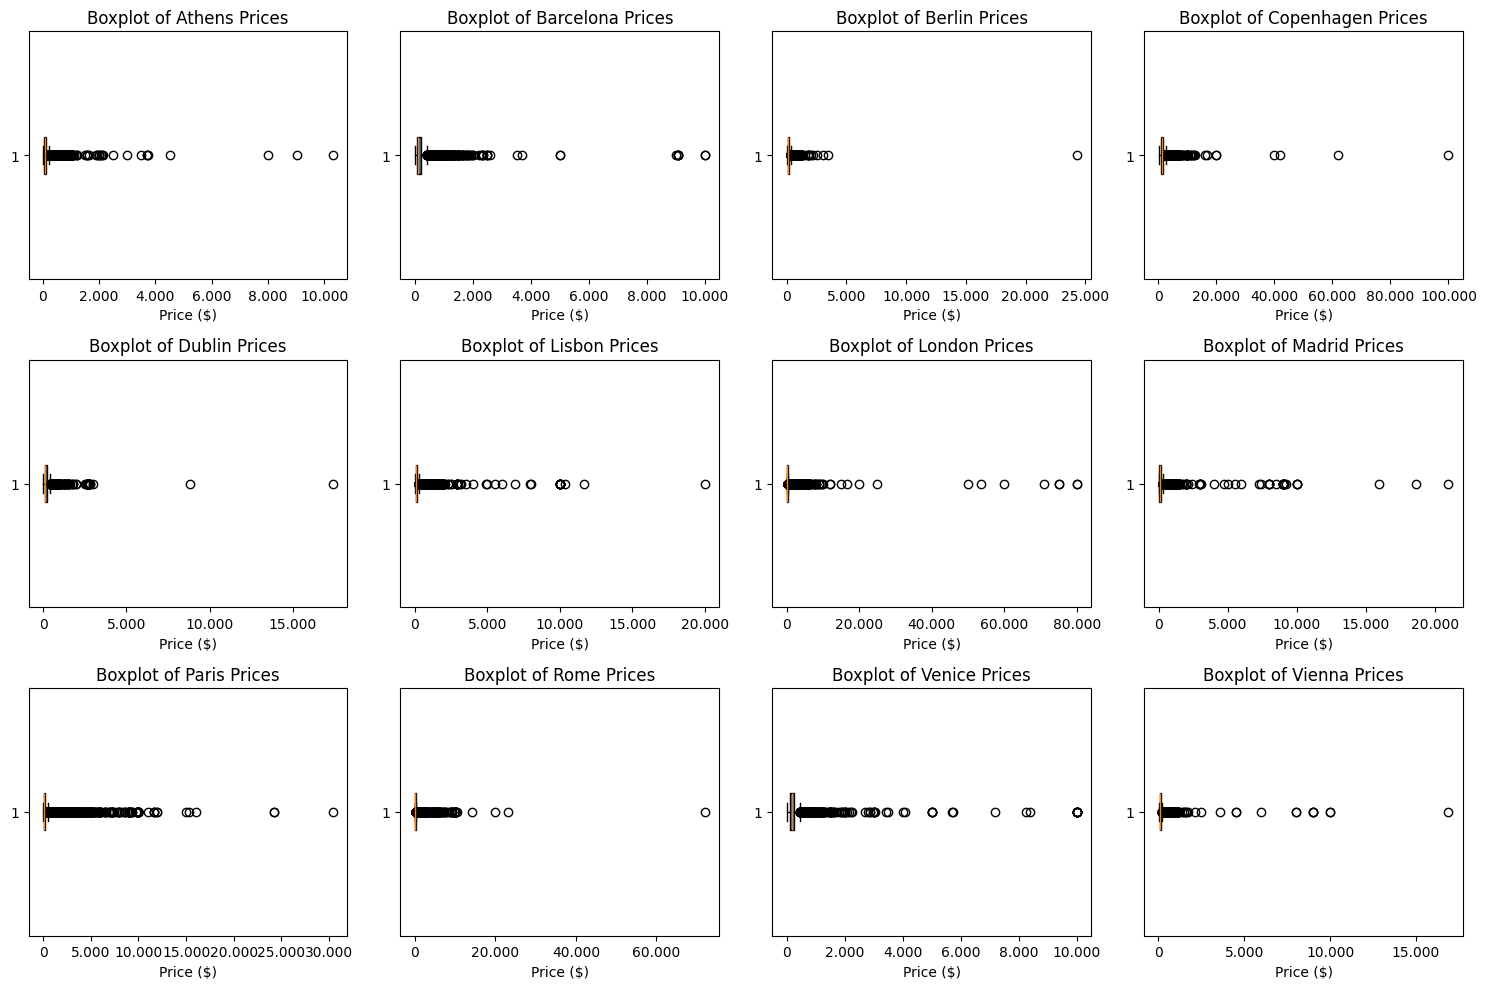

In [27]:
from matplotlib.ticker import FuncFormatter

def format_thousands(x, pos):
    return f'{int(x):,}'.replace(',', '.')


fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

#flattening the axes array to loop over each subplot easily
axes = axes.flatten()

city_counter = 0  
for city in city_name_list:
    if city != 'amsterdam':  
        ax = axes[city_counter]  
        ax.boxplot(city_listings_copy[city]['price'], vert=False, patch_artist=True)
        ax.set_title(f"Boxplot of {city.capitalize()} Prices")
        ax.set_xlabel("Price ($)")
        
        ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))
        
        city_counter += 1  

# adjusting layout to prevent overlap
plt.tight_layout()
plt.show()

It is clear that most prices are under $15.000 for every city. Let's see how many prices are in each price range for each city

In [28]:
price_thresholds = [150000, 10000, 5000, 4000, 3000, 2000, 1000]

# creating a list of cities excluding 'amsterdam' since we've already checked
cities = [city for city in city_listings_copy if city != 'amsterdam']

for i in range(0, len(cities), 6):
    row_cities = cities[i:i+6]
    
    total_listings_row = [f"{city.capitalize()} Total: {city_listings_copy[city].shape[0]}" for city in row_cities]
    print(" | ".join(total_listings_row))  
    
    for threshold in price_thresholds:
        row_output = []  
        
        for city in row_cities:
            count = city_listings_copy[city][city_listings_copy[city]['price'] > threshold]['price'].count()
            row_output.append(f"{city.capitalize()}: {count}")  
        
        print(f"Threshold > {int(threshold)}: " + " | ".join(row_output))  
    

    row_output = [] 
    for city in row_cities:
        count = city_listings_copy[city][city_listings_copy[city]['price'] <= 999]['price'].count()
        row_output.append(f"{city.capitalize()}: {count}") 
    print(f"Threshold <= 999: " + " | ".join(row_output)) 
    
    print("\n" + "="*40 + "\n") 


Athens Total: 13068 | Barcelona Total: 15422 | Berlin Total: 8821 | Copenhagen Total: 13596 | Dublin Total: 5211 | Lisbon Total: 21233
Threshold > 150000: Athens: 0 | Barcelona: 0 | Berlin: 0 | Copenhagen: 0 | Dublin: 0 | Lisbon: 0
Threshold > 10000: Athens: 1 | Barcelona: 0 | Berlin: 1 | Copenhagen: 16 | Dublin: 1 | Lisbon: 3
Threshold > 5000: Athens: 3 | Barcelona: 7 | Berlin: 1 | Copenhagen: 92 | Dublin: 2 | Lisbon: 19
Threshold > 4000: Athens: 4 | Barcelona: 9 | Berlin: 1 | Copenhagen: 175 | Dublin: 2 | Lisbon: 22
Threshold > 3000: Athens: 9 | Barcelona: 11 | Berlin: 2 | Copenhagen: 440 | Dublin: 2 | Lisbon: 25
Threshold > 2000: Athens: 13 | Barcelona: 20 | Berlin: 5 | Copenhagen: 1586 | Dublin: 20 | Lisbon: 38
Threshold > 1000: Athens: 34 | Barcelona: 90 | Berlin: 33 | Copenhagen: 8399 | Dublin: 48 | Lisbon: 130
Threshold <= 999: Athens: 12999 | Barcelona: 15306 | Berlin: 8786 | Copenhagen: 4613 | Dublin: 5155 | Lisbon: 21072


London Total: 63205 | Madrid Total: 21068 | Paris Tot

It is clear that we should trim our data to keep all listings of a price **Lower Than $2.000**.   
We can see bellow that the loss would not be major.  
| City       | Total Listings | Listings with price <= $2000 | % Listings Lost (Above 2000) |
|------------|----------------|------------------|------------------------------|
| Athens     | 13,068         | 13,055          | 0.10%                        |
| Barcelona  | 15,422         | 15,402          | 0.13%                        |
| Berlin     | 8,821          | 8,816           | 0.06%                        |
| Copenhagen | 13,596         | 12,010          | 11.67%                       |
| Dublin     | 5,211          | 5,191           | 0.38%                        |
| Lisbon     | 21,233         | 21,195          | 0.18%                        |
| London     | 63,205         | 63,017          | 0.30%                        |
| Madrid     | 21,068         | 21,034          | 0.16%                        |
| Paris      | 64,230         | 63,759          | 0.73%                        |
| Rome       | 30,296         | 30,157          | 0.46%                        |
| Venice     | 7,419          | 7,383           | 0.48%                        |
| Vienna     | 10,611         | 10,592          | 0.18%                        |

  
Now let's trim our data and see the updated distribution.

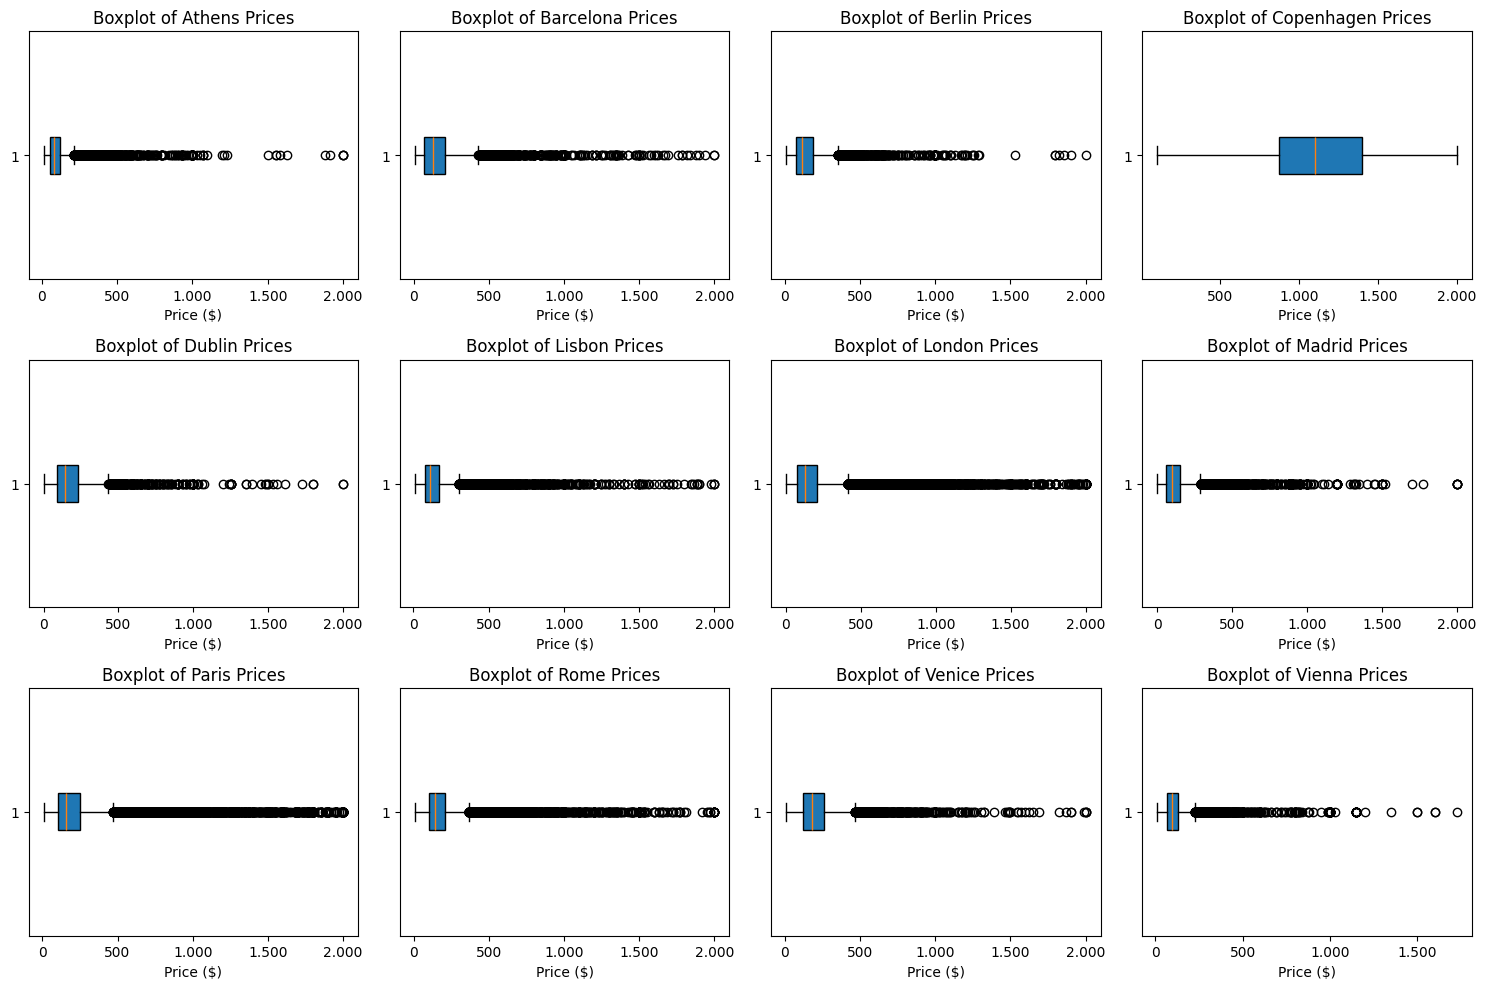

In [29]:
for city, df in city_listings_copy.items():
    city_listings_copy[city] = city_listings_copy[city][city_listings_copy[city]['price']<=2000]
# 3x4 grid of subplots (3 rows, 4 columns)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

#flattenong again the axes array to loop over each subplot easily
axes = axes.flatten()

city_counter = 0  
for city in city_name_list:
    if city != 'amsterdam':  
        ax = axes[city_counter]  
        ax.boxplot(city_listings_copy[city]['price'], vert=False, patch_artist=True)
        ax.set_title(f"Boxplot of {city.capitalize()} Prices")
        ax.set_xlabel("Price ($)")
        
        ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))
        
        city_counter += 1  

plt.tight_layout()
plt.show()

Great! now all unnecessary outliers have been trimmed.

- for the **number of reviews the last 12 months**  


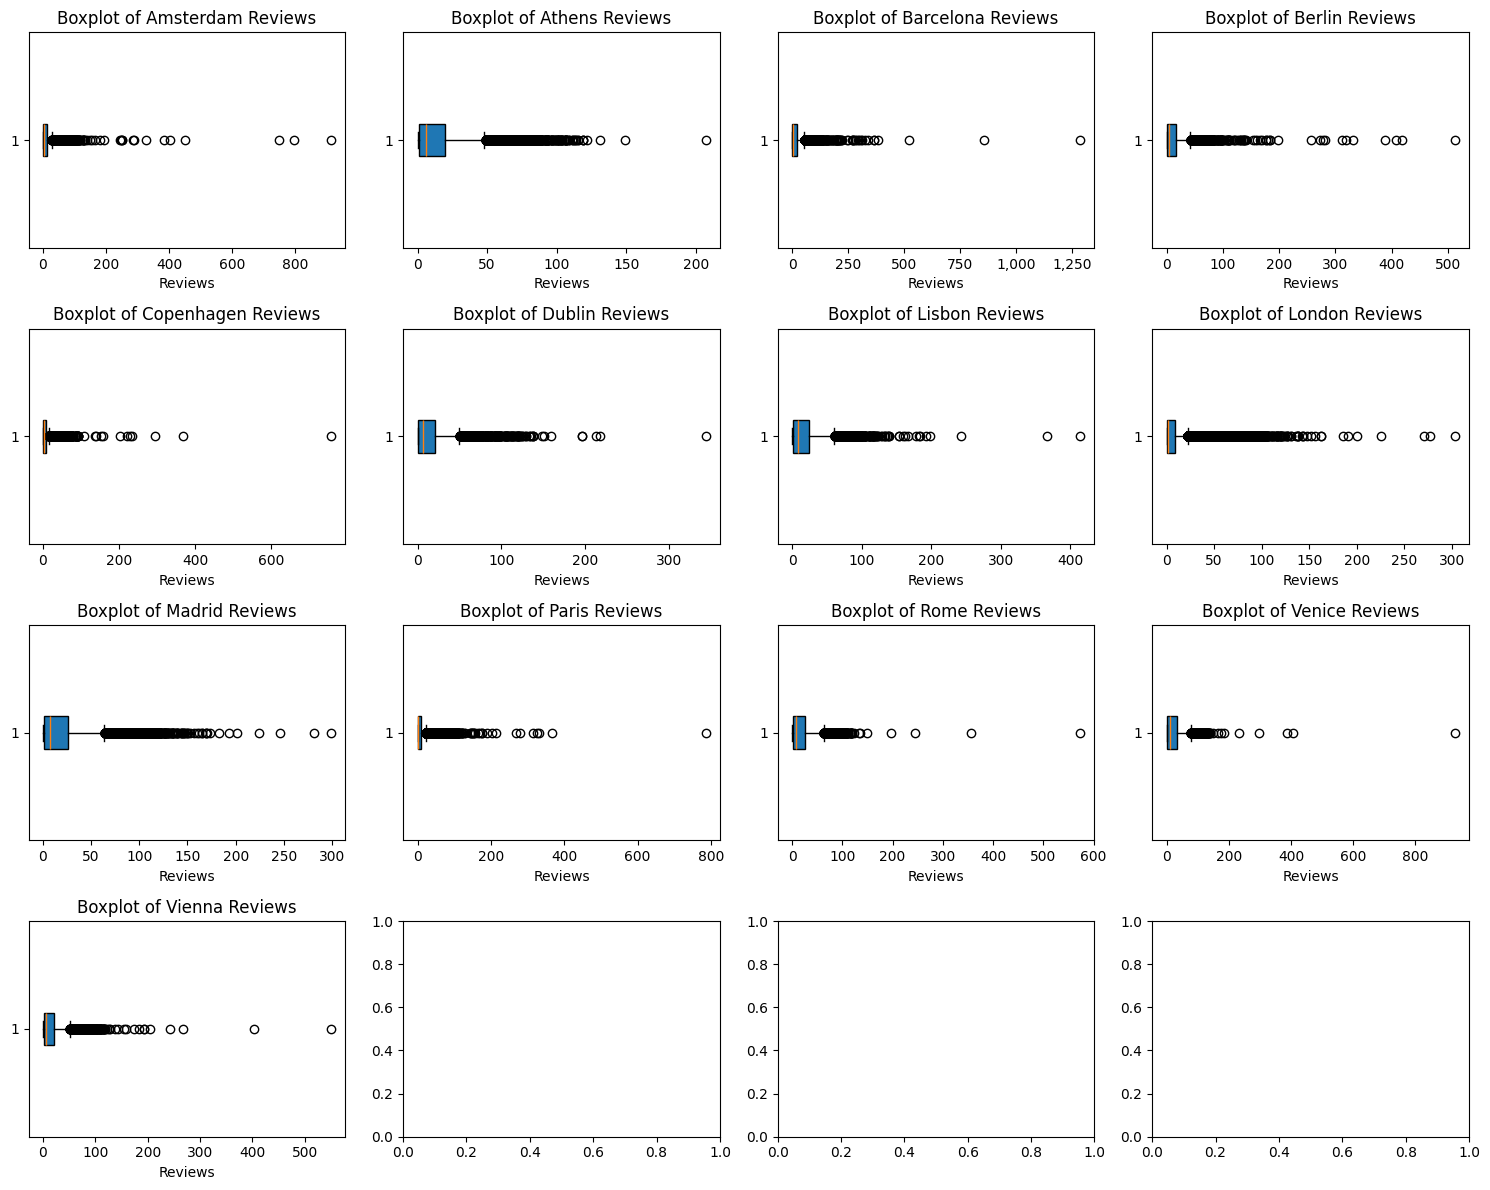

In [30]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def format_thousands(x, pos):
    return f'{int(x):,}'

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

axes = axes.flatten()

ax = axes[0]
ax.boxplot(city_listings_copy['amsterdam']['number_of_reviews_ltm'], vert=False, patch_artist=True)
ax.set_title("Boxplot of Amsterdam Reviews")
ax.set_xlabel("Reviews")
ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))

city_counter = 1  
for city in city_name_list:
    if city != 'amsterdam':  
        ax = axes[city_counter] 
        ax.boxplot(city_listings_copy[city]['number_of_reviews_ltm'], vert=False, patch_artist=True)
        ax.set_title(f"Boxplot of {city.capitalize()} Reviews")
        ax.set_xlabel("Reviews")
        
        ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))
        
        city_counter += 1  
plt.tight_layout()
plt.show()


Data distribution is too sparse. Let's look for the right threshold.

In [31]:
price_thresholds = [500, 400, 300, 200, 100]

cities = [city for city in city_listings_copy if city != 'amsterdam']

for i in range(0, len(cities), 6):
    row_cities = cities[i:i+6]
    
    total_listings_row = [f"{city.capitalize()} Total: {city_listings_copy[city].shape[0]}" for city in row_cities]
    print(" | ".join(total_listings_row))  
    
    for threshold in price_thresholds:
        row_output = [] 
        
        for city in row_cities:
            count = city_listings_copy[city][city_listings_copy[city]['number_of_reviews_ltm'] > threshold]['number_of_reviews_ltm'].count()
            row_output.append(f"{city.capitalize()}: {count}")  
        
        print(f"Threshold > {int(threshold)}: " + " | ".join(row_output)) 
    
    row_output = []  
    for city in row_cities:
        count = city_listings_copy[city][city_listings_copy[city]['number_of_reviews_ltm'] <= 100]['price'].count()
        row_output.append(f"{city.capitalize()}: {count}")  
    
    print(f"Threshold <= 100: " + " | ".join(row_output)) 
    
    print("\n" + "="*40 + "\n")  


Athens Total: 13055 | Barcelona Total: 15402 | Berlin Total: 8816 | Copenhagen Total: 12010 | Dublin Total: 5191 | Lisbon Total: 21195
Threshold > 500: Athens: 0 | Barcelona: 3 | Berlin: 1 | Copenhagen: 1 | Dublin: 0 | Lisbon: 0
Threshold > 400: Athens: 0 | Barcelona: 3 | Berlin: 3 | Copenhagen: 1 | Dublin: 0 | Lisbon: 1
Threshold > 300: Athens: 0 | Barcelona: 10 | Berlin: 7 | Copenhagen: 2 | Dublin: 1 | Lisbon: 2
Threshold > 200: Athens: 1 | Barcelona: 31 | Berlin: 11 | Copenhagen: 7 | Dublin: 3 | Lisbon: 3
Threshold > 100: Athens: 40 | Barcelona: 118 | Berlin: 49 | Copenhagen: 12 | Dublin: 60 | Lisbon: 64
Threshold <= 100: Athens: 13015 | Barcelona: 15284 | Berlin: 8767 | Copenhagen: 11998 | Dublin: 5131 | Lisbon: 21131


London Total: 63017 | Madrid Total: 21034 | Paris Total: 63759 | Rome Total: 30160 | Venice Total: 7383 | Vienna Total: 10597
Threshold > 500: London: 0 | Madrid: 0 | Paris: 1 | Rome: 1 | Venice: 1 | Vienna: 1
Threshold > 400: London: 0 | Madrid: 0 | Paris: 1 | Rome

It looks like we could keep our calculations more realistic to the average values if we **trim all rows with more than 200 reviews** without losing a significant percentage of our data:

| City       | Total Listings | reviews left the last 12 months <= 200 | % Reviews Lost (Above 200) |
|------------|----------------|------------------|---------------------|
| Athens     | 13,055         | 13,054          | 0.01%              |
| Barcelona  | 15,402         | 15,371          | 0.20%              |
| Berlin     | 8,816          | 8,805           | 0.12%              |
| Copenhagen | 12,010         | 12,003          | 0.06%              |
| Dublin     | 5,191          | 5,188           | 0.06%              |
| Lisbon     | 21,195         | 21,192          | 0.01%              |
| London     | 63,017         | 63,013          | 0.01%              |
| Madrid     | 21,034         | 21,029          | 0.02%              |
| Paris      | 63,759         | 63,750          | 0.01%              |
| Rome       | 30,160         | 30,157          | 0.01%              |
| Venice     | 7,383          | 7,378           | 0.07%              |
| Vienna     | 10,597         | 10,592          | 0.05%              |
  
Now let's trim our data and see the updated distribution.

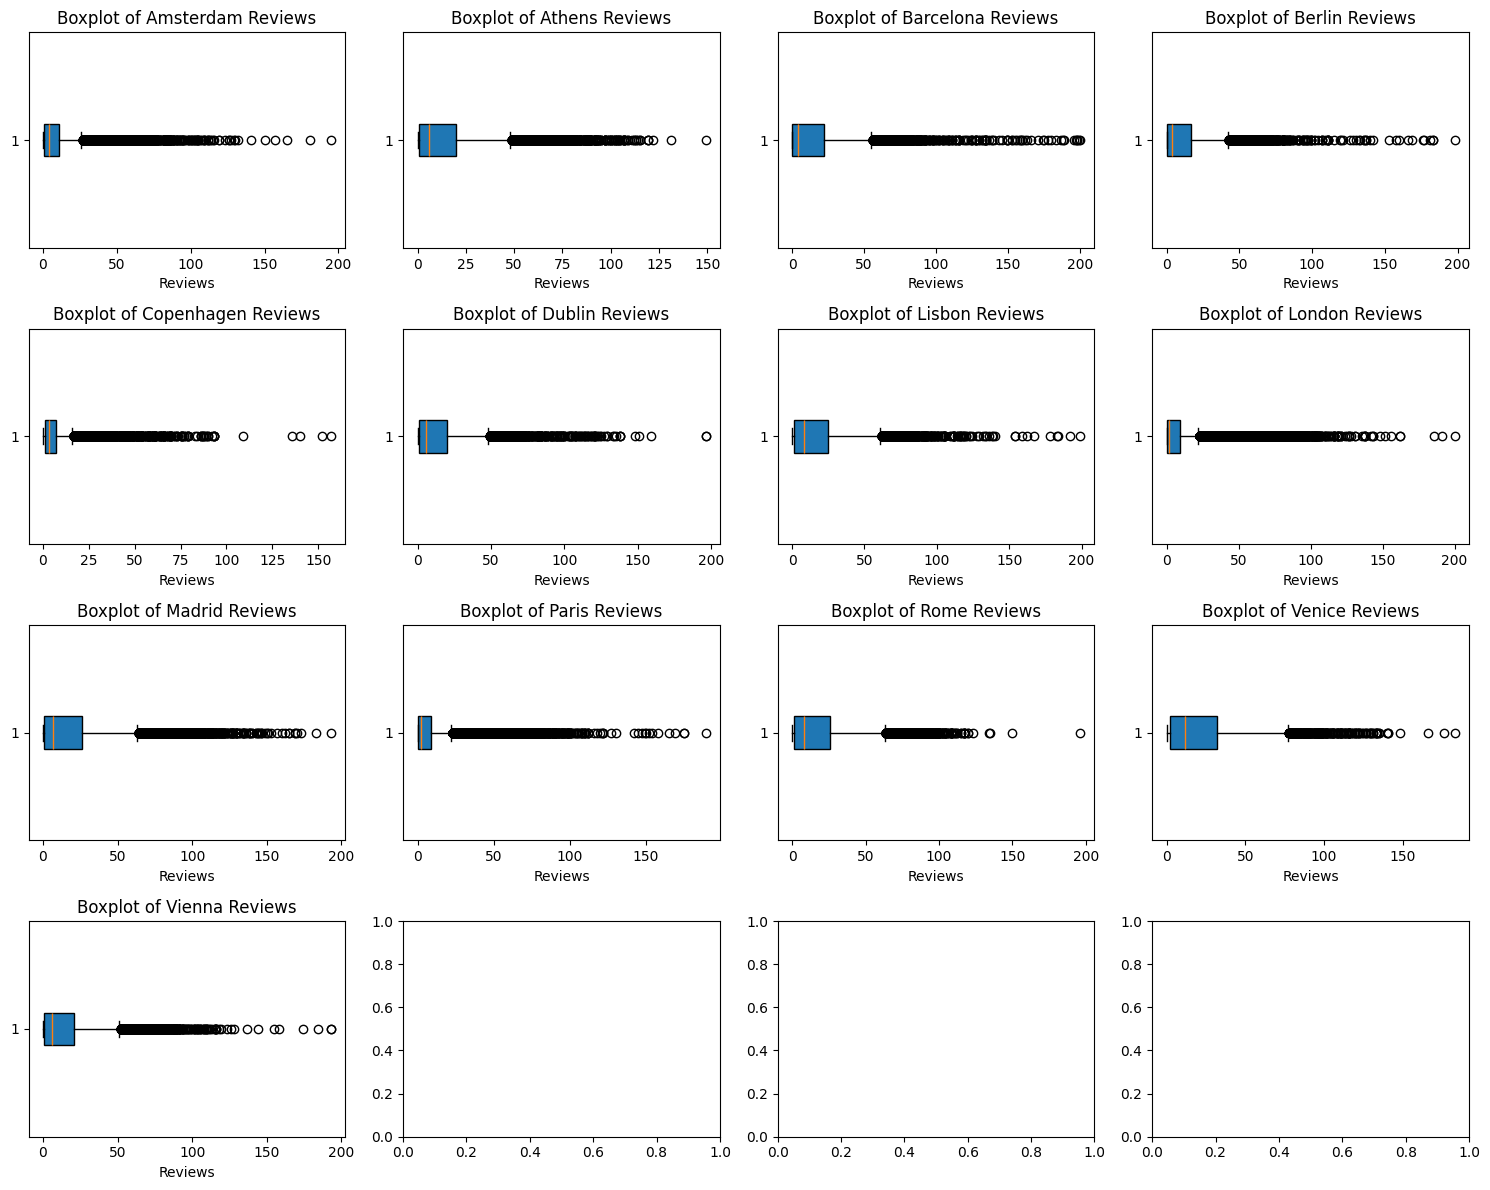

In [32]:
for city, df in city_listings_copy.items():
    city_listings_copy[city] = city_listings_copy[city][city_listings_copy[city]['number_of_reviews_ltm']<=200]

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 12))

axes = axes.flatten()

ax = axes[0]
ax.boxplot(city_listings_copy['amsterdam']['number_of_reviews_ltm'], vert=False, patch_artist=True)
ax.set_title("Boxplot of Amsterdam Reviews")
ax.set_xlabel("Reviews")
ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))

city_counter = 1  
for city in city_name_list:
    if city != 'amsterdam':  
        ax = axes[city_counter]  
        ax.boxplot(city_listings_copy[city]['number_of_reviews_ltm'], vert=False, patch_artist=True)
        ax.set_title(f"Boxplot of {city.capitalize()} Reviews")
        ax.set_xlabel("Reviews")
        
        ax.xaxis.set_major_formatter(FuncFormatter(format_thousands))
        
        city_counter += 1  

plt.tight_layout()
plt.show()

It looks like our prices and reviews are now represenative of the average case in both categories now.

### Step 2: Calculating The Average Number Of Nights Booked & The Income for Every Listing of Each City

The goal is to create a dictionairy where each `city key` maps to a Series of `(id, income_of_listing_id)` pairs. The calculation will happen exactly as we described above.

In [33]:
income_per_listing_per_city = {
    city: list(zip(df['id'], df['number_of_reviews_ltm'] * 2 * 3 * df['price']))
    for city, df in city_listings_copy.items()
}

Let's now check the containers of our dictionary, for example for Madrid

In [34]:
print(income_per_listing_per_city['madrid'][:10])

[(922279485725006244, 9900.0), (887120231398812211, 25482.0), (707073912721841330, 48312.0), (19011445, 66528.0), (782402536605430808, 4140.0), (1177153799736546245, 120.0), (791946049512096821, 2112.0), (700506328928861604, 750.0), (49895335, 0.0), (934873350239287909, 0.0)]


### Step 3: Calculating The Average Income per Listing for the City

The goal is to create a dictionairy where each `city key` maps to a value `income_per_listing_for_city_id`. The calculation will happen exactly as we described above.

In [35]:
avg_income_per_listing_per_city = {city: (sum(income for _, income in df) / len(df))
    for city, df in income_per_listing_per_city.items()
}

In [36]:
print(avg_income_per_listing_per_city)

{'amsterdam': 15540.003078501795, 'athens': 8697.736326030335, 'barcelona': 16179.114956736712, 'berlin': 11410.15741056218, 'copenhagen': 39159.2111972007, 'dublin': 15240.371241326136, 'lisbon': 13104.768686296717, 'london': 6750.806119372193, 'madrid': 12456.192305863331, 'paris': 8069.401694117647, 'rome': 16669.520244056108, 'venice': 24757.402819192193, 'vienna': 8838.115558912386}


**Let's now see the results**



In [37]:
avg_income_table = pd.DataFrame({
  "Cities": [city.capitalize() for city in avg_income_per_listing_per_city],  
    "Average Income Per Listing": [avg_income_per_listing_per_city[city] for city in avg_income_per_listing_per_city.keys()]
})

avg_income_table.style \
  .format(precision=1, thousands=".", decimal=",") \
  .format_index(str.upper, axis=1) \
  .relabel_index(["1", "2", "3", "4", "5", "6", "7", "8", "9", 
                  "10", "11", "12", "13"], axis=0) \
  .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
  ])

,CITIES,AVERAGE INCOME PER LISTING
1,Amsterdam,"15.540,0"
2,Athens,"8.697,7"
3,Barcelona,"16.179,1"
4,Berlin,"11.410,2"
5,Copenhagen,"39.159,2"
6,Dublin,"15.240,4"
7,Lisbon,"13.104,8"
8,London,"6.750,8"
9,Madrid,"12.456,2"
10,Paris,"8.069,4"


## Cross-check

We have now found the total number of bookings and nights spent over the last 12 months period for which we have data, for each of the cities. It's time to compare our findings with publicly available data.  

Let's remember what we found earlier as the total number of bookings and nights spent over the last 12 months period:

In [38]:
total_bookings_per_city = {city: sum(df['number_of_reviews_ltm'])*2 for city, df in city_listings_copy.items()}
total_nights_booked_per_city = {city: sum(df['number_of_reviews_ltm'])*2*3 for city, df in city_listings_copy.items()}

bookings_nights_summary = pd.DataFrame({
    "Cities": [city.capitalize() for city in total_bookings_per_city.keys()],
    "Total Bookings": [total_bookings_per_city[city] for city in total_bookings_per_city],
    "Total Nights Booked": [total_nights_booked_per_city[city] for city in total_nights_booked_per_city]
})

bookings_nights_summary.style \
    .format(precision=0, thousands=".", decimal=",") \
    .format_index(str.upper, axis=1) \
    .relabel_index([str(i) for i in range(1, len(bookings_nights_summary) + 1)], axis=0) \
    .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
    ])

,CITIES,TOTAL BOOKINGS,TOTAL NIGHTS BOOKED
1,Amsterdam,149.112,447.336
2,Athens,378.316,1.134.948
3,Barcelona,422.012,1.266.036
4,Berlin,219.056,657.168
5,Copenhagen,145.070,435.210
6,Dublin,159.602,478.806
7,Lisbon,688.744,2.066.232
8,London,1.006.780,3.020.340
9,Madrid,728.340,2.185.020
10,Paris,933.686,2.801.058


Now it is time to find publicly available data concerning the total number of bookings and nights spent over the last 12 months.  

One initial thought would be to check the calendar.csv that exists for each city on Inside Airbnb and consider the dates for which a listing is marked "unavailable" as booked dates. But, the Data Assumptions page of Inside Airbnb states that:   
*"The Airbnb calendar for a listing does not differentiate between a booked night vs an unavailable night, therefore these bookings have been counted as "unavailable". This serves to understate the Availability metric because popular listings will be "booked" rather than being "blacked out" by a host."*   
which means an unavailable date could simply mean that the airbnb listing was not available for booking instead of booked.  
    
It is clear that we'll need to look somewhere else for data to use for our cross-checking. **Unfortunately**, detailed data for airbnb bookings in the last 12 months could not be found online.  But there is another way to calculate, approximately,  realistical bookings and nights spent over the last 12 months period. 

We’ll use [AirDNA](https://www.airdna.co/), which provides highly accurate and regularly updated data on vacation rentals. AirDNA's data is refreshed daily, typically covering the last 12 months, which allows us to access reliable insights on key metrics like occupancy rates, average daily rates, and revenue trends. This will help us benchmark our findings against current market-wide figures.

Although some of AirDNA’s data need a paid subscription to be accessed, there are enough free data for us to make our calculations. Let's see for example the data pprovided for Amsterdam: [AirDNA Amsterdam Overview](https://www.airdna.co/vacation-rental-data/app/nl/default/amsterdam/overview).   

There are **3 key values** we can get from that website:
* **Total available listings**: The number of listings, not only of airbnb, available the last 12 months.
* **Listings by rental channel**: We can see which percentage of those listings is from airbnb and whic isn't, so we can calculate the exact number of airbnb listings.
* **Occupancy Rate**: Occupancy rate for Airbnb listings is the percentage of booked nights compared to available nights.
  
To calculate the number of nights spent:
1. **Determine the Total Number of Airbnb Listings**:
   - We will multiply the total number of available listings by the percentage of them that is Airbnb.

2. **Determine the Total Number of Available Nights**:
   - We will multiply the total number of available Airbnb listings by the number of nights in the last 12 months (365 days).

3. **Calculate the Number of Booked Nights**:
   - We will multiply the **Occupancy Rate** by the total number of available nights (calculated above).

4. **Final Formula**:  
$$
\text{Number of Nights Spent} = \text{Total Available Listings}\times \text{Percentage Airbnb} \times 365 \times \text{Occupancy Rate}
$$  
After going through the data of AirDNA, as they are in the time of the creation of this project, i managed to collect the following values for the cities of our interest, but, since the website is updated daily, there could be different values on the website depending on when this project is being examined. 
 
| City       | Total Listings | Percentage Airbnb | Occupancy Rate |
|------------|----------------|-------------------|----------------|
| Amsterdam  | 10,295         | 94%               | 69%            |
| Athens     | 17,989         | 78%               | 61%            |
| Barcelona  | 22,920         | 80%               | 66%            |
| Berlin     | 12,127         | 87%               | 65%            |
| Copenhagen | 21,888         | 95%               | 71%            |
| Dublin     | 7,956          | 92%               | 60%            |
| Lisbon     | 20,873         | 76%               | 69%            |
| London     | 115,604        | 82%               | 57%            |
| Madrid     | 33,790         | 85%               | 65%            |
| Paris      | 96,207         | 83%               | 58%            |
| Rome       | 39,914         | 78%               | 67%            |
| Venice     | 11,006         | 73%               | 64%            |
| Vienna     | 18,896         | 86%               | 60%            |  
  
Let's now turn this into a dictionary and then use it to calculate total booked nights as stated above.


In [39]:
cities_data = {
    'amsterdam': [10295, 0.94, 0.69],
    'athens': [17989, 0.78, 0.61],
    'barcelona': [22920, 0.80, 0.66],
    'berlin': [12127, 0.87, 0.65],
    'copenhagen': [21888, 0.95, 0.71],
    'dublin': [7956, 0.92, 0.60],
    'lisbon': [20873, 0.76, 0.69],
    'london': [115604, 0.82, 0.57],
    'madrid': [33790, 0.85, 0.65],
    'paris': [96207, 0.83, 0.58],
    'rome': [39914, 0.78, 0.67],
    'venice': [11006, 0.73, 0.64],
    'vienna': [18896, 0.86, 0.60]
}
alternative_total_nights_booked = {}
for city, df in cities_data.items():
    alternative_total_nights_booked[city] = (cities_data[city][0]*cities_data[city][1])*365*cities_data[city][2]

for city, total_nights in alternative_total_nights_booked.items():
    print(f"City: {city.capitalize()} | Total nights spent over the last 12 months: {int(total_nights)}")

City: Amsterdam | Total nights spent over the last 12 months: 2437228
City: Athens | Total nights spent over the last 12 months: 3124095
City: Barcelona | Total nights spent over the last 12 months: 4417142
City: Berlin | Total nights spent over the last 12 months: 2503103
City: Copenhagen | Total nights spent over the last 12 months: 5388661
City: Dublin | Total nights spent over the last 12 months: 1602974
City: Lisbon | Total nights spent over the last 12 months: 3995217
City: London | Total nights spent over the last 12 months: 19722158
City: Madrid | Total nights spent over the last 12 months: 6814175
City: Paris | Total nights spent over the last 12 months: 16904628
City: Rome | Total nights spent over the last 12 months: 7613555
City: Venice | Total nights spent over the last 12 months: 1876831
City: Vienna | Total nights spent over the last 12 months: 3558872


Great, we have the number of nights booked for our cross checking data! What we need to do now is calculate the number of bookings.    

There are a lot of useful data available online to help us determine that value. More specifically in this research named [Airbnb Revenue and Booking Statistics](https://backlinko.com/airbnb-stats), which was **last updated Jul. 26, 2024**, it is stated that the **Average Nights per Airbnb Booking** in **Europe** is **3.9 nights**.    

This means that, since we have calculated the number of booked nights in each city, in order to calculate the **number of bookings of each city** we should just divide the number of nights for that city by 3.9.

In [40]:
alternative_total_bookings = {}
for city, total_nights in alternative_total_nights_booked.items():
    alternative_total_bookings[city] = round(total_nights/3.9)

for city, total_bookings in alternative_total_bookings.items():
    print(f"City: {city.capitalize()} | Total bookings (rounded): {total_bookings}")

City: Amsterdam | Total bookings (rounded): 624930
City: Athens | Total bookings (rounded): 801050
City: Barcelona | Total bookings (rounded): 1132601
City: Berlin | Total bookings (rounded): 641821
City: Copenhagen | Total bookings (rounded): 1381708
City: Dublin | Total bookings (rounded): 411019
City: Lisbon | Total bookings (rounded): 1024415
City: London | Total bookings (rounded): 5056964
City: Madrid | Total bookings (rounded): 1747225
City: Paris | Total bookings (rounded): 4334520
City: Rome | Total bookings (rounded): 1952194
City: Venice | Total bookings (rounded): 481239
City: Vienna | Total bookings (rounded): 912531


Let's merge into one dictionary and show the values in tabular form

In [41]:
alternative_bookings_nights = {}

for city, total_nights in alternative_total_nights_booked.items():
    total_bookings = round(total_nights / 3.9)
    alternative_bookings_nights[city] = {
        'Total Bookings (Alternative)': total_bookings,  
        'Total Nights Booked (Alternative)': int(total_nights)  
    }

alternative_bookings_nights_summary = pd.DataFrame({
    "Cities": [city.capitalize() for city in alternative_bookings_nights.keys()],
    "Total Bookings (Alternative)": [alternative_bookings_nights[city]['Total Bookings (Alternative)'] for city in alternative_bookings_nights],
    "Total Nights Booked (Alternative)": [alternative_bookings_nights[city]['Total Nights Booked (Alternative)'] for city in alternative_bookings_nights]
})

alternative_bookings_nights_summary.style \
    .format(precision=0, thousands=".", decimal=",") \
    .format_index(str.upper, axis=1) \
    .relabel_index([str(i) for i in range(1, len(alternative_bookings_nights_summary) + 1)], axis=0) \
    .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
    ])

,CITIES,TOTAL BOOKINGS (ALTERNATIVE),TOTAL NIGHTS BOOKED (ALTERNATIVE)
1,Amsterdam,624.930,2.437.228
2,Athens,801.050,3.124.095
3,Barcelona,1.132.601,4.417.142
4,Berlin,641.821,2.503.103
5,Copenhagen,1.381.708,5.388.661
6,Dublin,411.019,1.602.974
7,Lisbon,1.024.415,3.995.217
8,London,5.056.964,19.722.158
9,Madrid,1.747.225,6.814.175
10,Paris,4.334.520,16.904.628


Let's compare our previous data and those we just uncovered.  

* **In tabular form**

In [42]:
merged_summary_df = pd.merge(
    bookings_nights_summary,
    alternative_bookings_nights_summary,
    on="Cities",
)

merged_summary_df.style \
    .format(precision=0, thousands=".", decimal=",") \
    .format_index(str.upper, axis=1) \
    .set_table_styles([
        {"selector": "thead th", "props": [("background-color", "lightblue")]},    
        {"selector": ".index_name", "props": [("background-color", "lightblue")]}, 
        {"selector": "th:first-child", "props": [("background-color", "lightblue")]} 
    ])

,CITIES,TOTAL BOOKINGS,TOTAL NIGHTS BOOKED,TOTAL BOOKINGS (ALTERNATIVE),TOTAL NIGHTS BOOKED (ALTERNATIVE)
0,Amsterdam,149.112,447.336,624.930,2.437.228
1,Athens,378.316,1.134.948,801.050,3.124.095
2,Barcelona,422.012,1.266.036,1.132.601,4.417.142
3,Berlin,219.056,657.168,641.821,2.503.103
4,Copenhagen,145.070,435.210,1.381.708,5.388.661
5,Dublin,159.602,478.806,411.019,1.602.974
6,Lisbon,688.744,2.066.232,1.024.415,3.995.217
7,London,1.006.780,3.020.340,5.056.964,19.722.158
8,Madrid,728.340,2.185.020,1.747.225,6.814.175
9,Paris,933.686,2.801.058,4.334.520,16.904.628



We can now compare the total bookings and nights booked with the alternative data we sourced (from AirDNA).

* Airbnb Listings & Bookings:
The total bookings and nights booked show that cities like **London** (63,013 bookings) and **Paris** (63,750 bookings) dominate in terms of volume compared to smaller cities like **Dublin** (5,188 bookings) and **Venice** (7,378 bookings).

* Alternative Data:
The alternative data for other vacation rental platforms shows higher values in most cities, especially **Paris**, **Barcelona**, and **Lisbon**. This suggests these cities have a significant market share beyond Airbnb, which may lead to underestimating the true market size in our initial data.
 
The alternative data from AirDNA reveals higher overall booking and night counts compared to our Airbnb-specific data, especially in popular cities like London, Paris, and Lisbon. This discrepancy suggests that while Airbnb captures a significant portion of the market, other platforms like Vrbo also contribute considerably to the total bookings. **The differences highlight the fact that our data, which only accounts for Airbnb listings, may underestimate the true market size. However, the general trends are consistent, supporting the overall accuracy of our data.**